In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout 
import random
from keras.utils.np_utils import to_categorical
from keras.layers.normalization import BatchNormalization

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


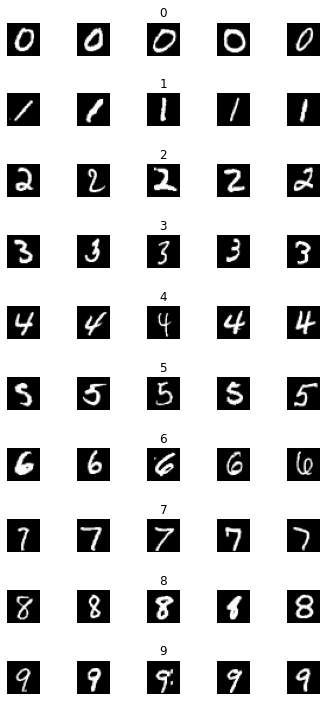

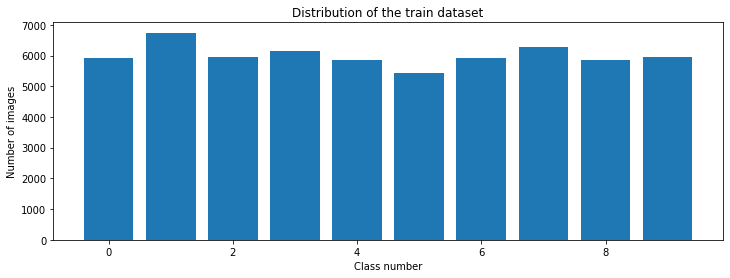

In [20]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000,28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [25]:
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
def model():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
  model.add(BatchNormalization(axis=-1))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(BatchNormalization(axis=-1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64,(3, 3)))
  model.add(BatchNormalization(axis=-1))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(BatchNormalization(axis=-1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())

  # Fully connected layer
  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10))

  model.add(Activation('softmax'))

  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model 



model = model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)       

In [26]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 14s 254us/step - loss: 0.1240 - accuracy: 0.9628 - val_loss: 3.9752 - val_accuracy: 0.1538
Epoch 2/10
54000/54000 [==============================] - 6s 109us/step - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.3486 - val_accuracy: 0.8942
Epoch 3/10
54000/54000 [==============================] - 6s 109us/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0649 - val_accuracy: 0.9812
Epoch 4/10
54000/54000 [==============================] - 6s 109us/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0489 - val_accuracy: 0.9857
Epoch 5/10
54000/54000 [==============================] - 6s 108us/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0478 - val_accuracy: 0.9883
Epoch 6/10
54000/54000 [==============================] - 6s 108us/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.0368 - val_accuracy: 0.9900
Epoch 7/10
54000/54000 [==============================] - 6s 1

Text(0.5, 0, 'epoch')

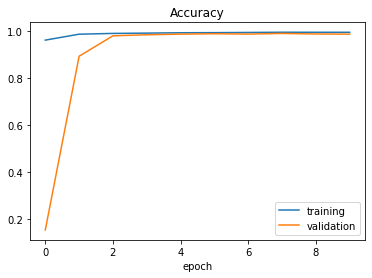

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [28]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.035873333871019576
Test accuracy: 0.9891999959945679


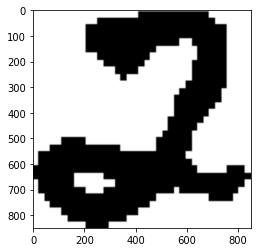

In [29]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(1, 28, 28, 1)


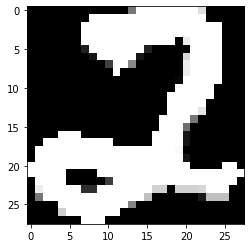

In [32]:
import numpy as np
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

In [33]:
print(img.shape)
print("predicted digit: "+str(model.predict_classes(img)))
 

(1, 28, 28, 1)
predicted digit: [2]
